In [31]:
# Imports
from snn.Model import Model
from snn.LIF import LIF
from snn.Synapse import Synapse
import random
import networkx as nx

In [32]:
# Initial Model
model = Model([10, 2], LIF, Synapse)
first_pattern = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
second_pattern =[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

sorted([(key, model.synapses[key].weight) for key in model.synapses], key=lambda x: x[0][2])

[((0, 0, 0), 0.5810665262186913),
 ((0, 1, 0), 0.6221441739858107),
 ((0, 2, 0), 0.5133248990848953),
 ((0, 3, 0), 0.5163098540757883),
 ((0, 4, 0), 0.3786179538030119),
 ((0, 5, 0), 0.42003362778225906),
 ((0, 6, 0), 0.45987588837491383),
 ((0, 7, 0), 0.5253481505018001),
 ((0, 8, 0), 0.4833880909229477),
 ((0, 9, 0), 0.4592186070379487),
 ((0, 0, 1), 0.5396442877082358),
 ((0, 1, 1), 0.5309677893321294),
 ((0, 2, 1), 0.4486210279584682),
 ((0, 3, 1), 0.5212054575614199),
 ((0, 4, 1), 0.4945937298975928),
 ((0, 5, 1), 0.5103332782570111),
 ((0, 6, 1), 0.3995035677268057),
 ((0, 7, 1), 0.4051840829574269),
 ((0, 8, 1), 0.5057177694170487),
 ((0, 9, 1), 0.4741535717141823)]

In [33]:
# Functions
def add_pattern_to_model(network, pattern, start_time):
    for index, spike in enumerate(pattern):
        if not spike: 
            continue
        network.add_spike_to_input(index, start_time + spike)

def add_random_noise(network, input_size, start_time, period=3):
    for i in range(input_size):
        will_spike = random.choice([True, False, False, False, False])
        if will_spike:
            spike_time = start_time + random.random() * period
            network.add_spike_to_input(i, spike_time)

In [34]:
# Netword drawer
def draw_network(network, scaling_factor=3):
    graph = nx.Graph()
    for layer, pre, post in network.synapses:
        graph.add_edge(pre, 10 + post, weight=network.synapses[layer, pre, post].weight)
    pos = nx.bipartite_layout(graph, [x for x in range(10)])
    weights = [graph[u][v]['weight'] * scaling_factor for u,v in graph.edges()]
    nx.draw(graph, pos, width=weights)

[((0, 0, 0), 1.0),
 ((0, 1, 0), 1.0),
 ((0, 2, 0), 1.0),
 ((0, 3, 0), 1.0),
 ((0, 4, 0), 0.3720179538030126),
 ((0, 5, 0), 0.4134336277822598),
 ((0, 6, 0), 0.45327588837491456),
 ((0, 7, 0), 0.5187481505018008),
 ((0, 8, 0), 0.47678809092294844),
 ((0, 9, 0), 0.4526186070379494),
 ((0, 0, 1), 1.0),
 ((0, 1, 1), 1.0),
 ((0, 2, 1), 1.0),
 ((0, 3, 1), 1.0),
 ((0, 4, 1), 0.48799372989759354),
 ((0, 5, 1), 0.5037332782570119),
 ((0, 6, 1), 0.3929035677268064),
 ((0, 7, 1), 0.39858408295742764),
 ((0, 8, 1), 0.49911776941704944),
 ((0, 9, 1), 0.46755357171418305)]

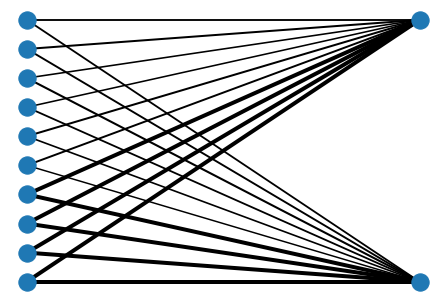

In [35]:
# Simulation 1
cycles = 50
time = 0
for _ in range(cycles):
    add_pattern_to_model(model, first_pattern, time)
    time = model.run()
    
    # add_random_noise(model, 10, time)
    # time = model.run()
    
    # add_pattern_to_model(model, second_pattern, time)
    # time = model.run()
    # 
    # add_random_noise(model, 10, time)
    # time = model.run()
    
draw_network(model, 4)
sorted([(key, model.synapses[key].weight) for key in model.synapses], key=lambda x: x[0][2])


[((0, 0, 0), 1.0),
 ((0, 1, 0), 1.0),
 ((0, 2, 0), 1.0),
 ((0, 3, 0), 1.0),
 ((0, 4, 0), 0),
 ((0, 5, 0), 0.01343362778228897),
 ((0, 6, 0), 0.05327588837494865),
 ((0, 7, 0), 0.11874815050184397),
 ((0, 8, 0), 0.07678809092298579),
 ((0, 9, 0), 0.052618607037983434),
 ((0, 0, 1), 1.0),
 ((0, 1, 1), 1.0),
 ((0, 2, 1), 1.0),
 ((0, 3, 1), 1.0),
 ((0, 4, 1), 0.08799372989763245),
 ((0, 5, 1), 0.10373327825705296),
 ((0, 6, 1), 0),
 ((0, 7, 1), 0),
 ((0, 8, 1), 0.0991177694170899),
 ((0, 9, 1), 0.06755357171421912)]

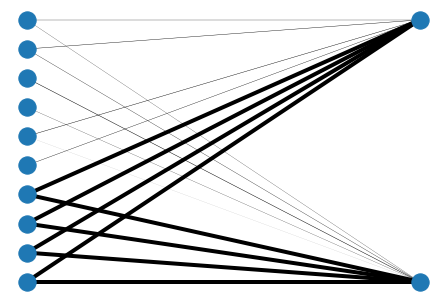

In [37]:
# Simulation 2
cycles = 3000
time = 0
for _ in range(cycles):
    add_pattern_to_model(model, first_pattern, time)
    time = model.run()
    
    # add_random_noise(model, 10, time)
    # time = model.run()
    
    # add_pattern_to_model(model, second_pattern, time)
    # time = model.run()
    # 
    # add_random_noise(model, 10, time)
    # time = model.run()
    
draw_network(model, 4)
sorted([(key, model.synapses[key].weight) for key in model.synapses], key=lambda x: x[0][2])
